In [ ]:
!pip install numpy
!pip install --user matplotlib
!pip install --user scikit-learn

In [8]:
import numpy as np
from matplotlib import pyplot as plt
import random
from sklearn.decomposition import PCA

def data_production(class_number,data_number) :
    import numpy as np
    import random
    from matplotlib import pyplot as plt
    
    """r1 = [[40,60]]
    r2 = [[35,65]]
    r3 = [[30,70]]
    r4 = [[25,75]]
    r5 = [[20,80]]"""
    r1 = [[40,60],[30,70],[20,80]] #input number is 3
    r2 = [[40,60],[34,66],[27,73],[20,80]] #input number is 4 [26,74]
    r3 = [[40,60],[35,65],[30,70],[25,75],[20,80]] #input number is 5
    
    r = [r1,r2,r3]
    r = r[class_number]
    group = len(r) 
    data = data_number;
    w = []; l = [];
    for i in range(0,group):
        for j in range(0,data):
            intra = np.zeros((100,100))
            while np.sum(intra.reshape(1,10000)) < random.randrange(25,101) :            
                intra[random.randrange(r[i][0],r[i][1]),random.randrange(r[i][0],r[i][1])] = 1
            w.append(intra); l.append(i)
    w = np.array(w)
    X = w.reshape(data*group,-1); y = np.array(l)
  
    return X


def PCA_reconstruction(X_train,X_test,Np):
    pca = PCA(n_components=Np,svd_solver='auto', whiten=True).fit(X_train)
    pca_test = pca.transform(X_test)
    recon_test = pca.inverse_transform(pca_test)
    return recon_test



def difference(class_number,Nd,Np,repeat):
    X_train = data_production(class_number,Nd)
    X_test = data_production(class_number,Nd)
    recon_test = PCA_reconstruction(X_train,X_test,Np)
    k = class_number+3
    
    sim_mean = []
    sim_std = []
    for i in range(0,k):  #클래스별로 계산
        Lst = [random.randint(i*Nd,((i+1)*Nd)-1) for h in range(repeat)]
        sim = []        
        for j in range(0,repeat): #샘플 추출 후 평균 산출
            s = 1-np.sqrt((np.sum((recon_test[Lst[j]]-X_test[Lst[j]])**2))/np.sum(X_test[Lst[j]]))
            sim.append(s )
        sim_mean.append(np.mean(sim))
        sim_std.append(np.std(sim))
        
    return np.array(sim_mean), np.array(sim_std)
    

    
def diff_data(class_number,Nd,repeat):
    """Np1 = [1,2,3,4,5]; Np2 = [40,45,50,55,60]; Np3 = [80,85,90,95,100]
    Np_o = np.array([Np1,Np2,Np3])*(Nd*5)/100; Np_o = Np_o.astype(int)"""
    """Np1 = [1,1,10,15,20,25,30]; Np2 = [35,40,45,50,55,60,65]; Np3 = [70,75,80,85,90,95,100]
    Np_o = np.array([Np1,Np2,Np3])*(Nd*5)/100; Np_o = Np_o.astype(int) """
    Np1 = [1,2,4]; Np2 = [8,16,32]; Np3 = [64,82,100]
    Np_o = np.array([Np1,Np2,Np3])*(Nd*5)/100; Np_o = Np_o.astype(int) 
    for i in range(0,len(Np_o)):
        Np = Np_o[i]        
        for j in range(0,len(Np)):
            mean, std = difference(class_number,Nd,Np[j],repeat)
            np.save('5R_mean_Nd = %d, Np = %d.npy' %(Nd*5,Np[j]),mean)
            np.save('5R_std_Nd = %d, Np = %d.npy' %(Nd*5,Np[j]),std)
            
def diff_plot(Nd):
    """Np1 = [1,2,3,4,5]; Np2 = [40,45,50,55,60]; Np3 = [80,85,90,95,100]
    Np_o = np.array([Np1,Np2,Np3])*(Nd*5)/100; Np_o = Np_o.astype(int)"""
    """Np1 = [1,1,10,15,20,25,30]; Np2 = [35,40,45,50,55,60,65]; Np3 = [70,75,80,85,90,95,100]
    Np_o = np.array([Np1,Np2,Np3])*(Nd*5)/100; Np_o = Np_o.astype(int)"""
    Np1 = [1,2,4]; Np2 = [8,16,32]; Np3 = [64,82,100]
    Np_o = np.array([Np1,Np2,Np3])*(Nd*5)/100; Np_o = Np_o.astype(int) 
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    plt.ylim(0,1.1)
    x = np.array([200,300,400,500,600])
    #color=['blue','green','red']
    for i in range(0,len(Np_o)):
        Np = Np_o[i]    
        for j in range(0,len(Np)):
            y = np.load('5R_mean_Nd = %d, Np = %d.npy' %(Nd*5,Np[j]))
            s = np.load('5R_std_Nd = %d, Np = %d.npy' %(Nd*5,Np[j]))
            plt.errorbar(x,y,s,fmt = '-',capsize = 3, label = '%0.2f'%(Np[j]/(Nd*5)))
            plt.legend(title='Np/Nd')
    ax.legend(title='Np/Nd',bbox_to_anchor=(1.0, 0.75))
    plt.xlabel('R (km)')
    plt.ylabel('Similarity')

    plt.title('5R case similarity_Nd=%d' %(Nd*5))
    

# Source_matarial

# Fig5_a

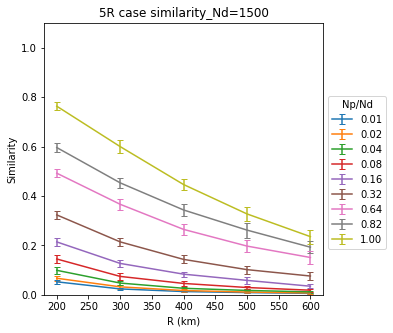

In [9]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#the number of data
Nd = 300
#repeat number for calculation of similarity
repeat = 50
diff_data(class_number,Nd,repeat)
diff_plot(Nd)
#plt.savefig('Fig5_a.eps',dpi = 500, Transparent=False)

# Fig5_b

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


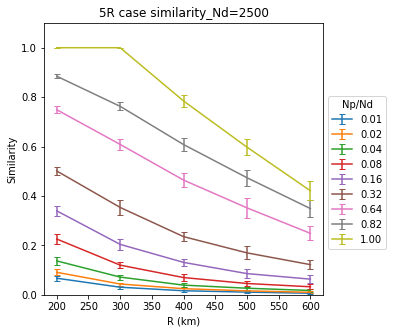

In [12]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#the number of data
Nd = 500
#repeat number for calculation of similarity
repeat = 50

diff_data(class_number,Nd,repeat)
diff_plot(Nd)
plt.savefig('Fig5_b.eps',dpi = 500, Transparent=False)

# Fig5_c

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


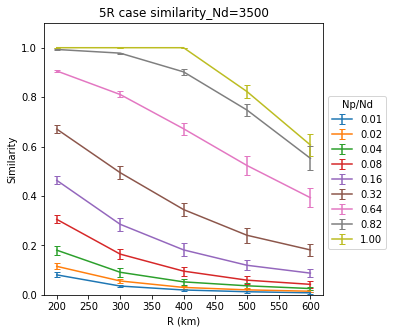

In [13]:
#class_number = {[0:R=200,400,600 km], [1:R=200,320,460,600 km], [2:R=200,300,400,500,600 km]}
class_number = 2
#the number of data
Nd = 700
#repeat number for calculation of similarity
repeat = 50

diff_data(class_number,Nd,repeat)
diff_plot(Nd)
plt.savefig('Fig5_c.eps',dpi = 500, Transparent=False)